From: A.K.

# Popular activation functions
In artificial neural networks the activation function of the neuron determines the output signal, which is determined by the input signal or a set of input signals.
Consider a neuron Z with an output value $$Z = \sum\limits_{i} w_{i}x_{i} + bias,$$ where $w_{i}$ and $x_{i}$ are the weight and input value of the i-th input, and bias is the bias. The obtained result is passed to the activation function, which decides whether to treat this neuron as activated or to ignore it.


## 1. Sigmoid or logistic function


$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

The input signal is converted to a value from the interval (0, 1) without taking into account the behavior of the function in +/- infinity

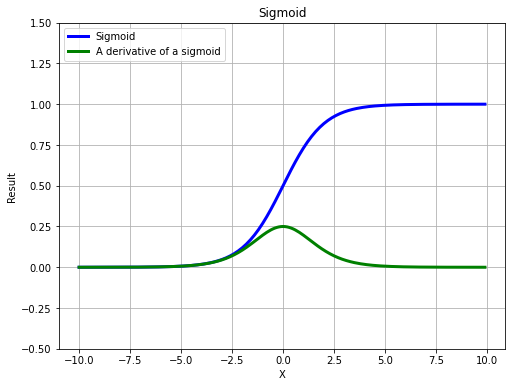

In [ ]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.arange(-10, 10, 0.1)
fig = plt.figure(figsize=(8, 6))
plt.plot(X, sigmoid(X), label='Sigmoid', c='blue', linewidth=3)
plt.plot(X, grad_sigmoid(X), label='A derivative of a sigmoid', c='green', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('X')
plt.grid(True)
plt.ylim([-0.5, 1.5])
plt.ylabel('Result')
plt.title('Sigmoid')
plt.show()

## Problems with sigmoid
#### 1. Fading gradient
The graph above shows that where the output is close to 0 or 1, the derivative tends to 0. This means that when updating the weights by back propagation of the error the process will be very slow, insignificant, and the learning will be close to zero.

If we look at the derivative of the sigmoid, we see that its maximum value is 0.25. Consequently, each gradient will shrink to at least 25% of its value (the worst case is 0) and, it turns out, the deeper the network is, the more knowledge it loses. Gradients that extend to shallow layers (i.e., layers close to the input layer) will not be as significant for updating the weights.

#### 2. Not centered relative to zero
In the backward propagation algorithm:

$$f=\sum w_ix_i+b$$ $$\frac{df}{dw_i}=x_i$$ $$\frac{dL}{dw_i}=\frac{dL}{df}\frac{df}{dw_i}=\frac{dL}{df}x_i$$

since $x_i>0$, the gradient $\dfrac{dL}{dw_i}$ will always have the same sign as $\dfrac{dL}{df}$ (all positive or all negative).

Consequently, if there is a weight that should update in the positive direction and another in the negative direction, this will not happen, and it will take time for the model to begin to converge.


#### 3. Computational complexity
The sigmoid calculation is computationally expensive

 *Consequently, it is recommended that the use of sigmoid be avoided if possible*


## 2. Hyperbolic tangent

$$f = tanh(x)$$

Outputs the result in the range [-1, 1]. This function, as you can see from the function values, is centered relative to zero and therefore works better than the sigmoid.

The relationship between the hyperbolic tangent and the sigmoid can be represented as follows:
$$tanh(x) = 2\sigma(2x) - 1$$

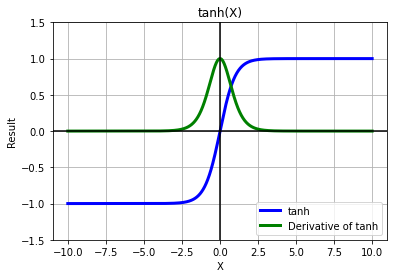

In [ ]:
def grad_tanh(x):
    return 1 - np.tanh(x)**2

X = np.arange(-10, 10, 0.01)
fig, ax = plt.subplots()
ax.plot(X, np.tanh(X), label='tanh',  c='blue', linewidth=3)
ax.plot(X, grad_tanh(X), label='Derivative of tanh', c='green', linewidth=3)
plt.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend(loc='lower right')
plt.xlabel('X')
plt.ylim([-1.5, 1.5])
plt.ylabel('Result')
plt.title('tanh(X)')
plt.show()

## 3. Rectified Linear Unit (ReLU)
This function returns 0 if it receives a negative input, but in the case of a positive input it returns the number itself. 

$$f(x) = max(0, x)$$

The ReLU function is one of the most used activation functions and has several advantages:

#### 1. Solves the vanishing gradient problem

#### 2. The derivative is very simple to calculate
For negative values it is 0, for positive values it is 1.

#### 2. Computationally less expensive and easy to implement 

But this function also has some weaknesses

### Problems with ReLU

#### The ReLU Dying Problem
Since the derivative part of the function is zero, the gradient for it will also be zero, which means that the weights will not change during descent and the neural network will stop learning.


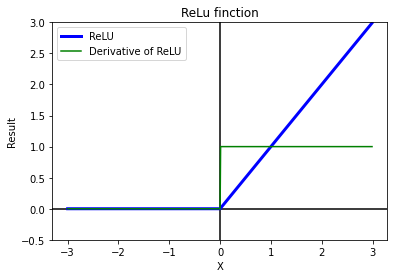

In [ ]:
def relu(x):
    return np.array([max(0, i) for i in x]) 

def grad_relu(x):
    return np.array([1 if i > 0 else 0 for i in x])

X = np.arange(-3, 3, 0.01)
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot(X, relu(X), label='ReLU',  c='blue', linewidth=3)
ax.plot(X, grad_relu(X), label='Derivative of ReLU', c='green')
plt.legend(loc = 'upper left')
plt.xlabel('X')
plt.ylim([-0.5, 3])
plt.ylabel('Result')
plt.title('ReLu finction')
plt.show()

## 4. Leaky ReLU

$$f_r(x) = max(\alpha x, x)$$


The "leaky ReLU" function focuses on solving the dying ReLu problem by multiplying the negative values by a small number (alpha). Therefore, the gradient on the negative values will be equal to alpha and the network will be able to recover.

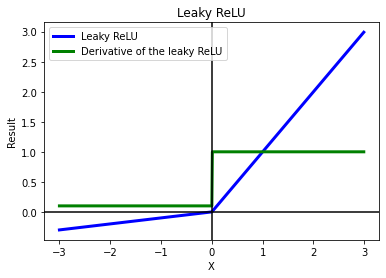

In [ ]:
# let's alpha = 0.1
def leaky_relu(x):
    return np.array([max(0.1*i, i) for i in x]) 

def grad_leaky_relu(x):
    return np.array([1 if i > 0 else 0.1 for i in x])

X = np.arange(-3, 3, 0.01)
fig, ax = plt.subplots()
ax.plot(X, leaky_relu(X), label='Leaky ReLU',  c='blue', linewidth=3)
ax.plot(X, grad_leaky_relu(X), label='Derivative of the leaky ReLU', c='green', linewidth=3)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend(loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Result')
plt.title('Leaky ReLU')
plt.show()

## There are also a number of other activation functions

![Некоторые функции активации](https://www.cs.us.es/~fsancho/images/2019-12/activationfunctions.png)

## Special mention should also be made of the softmax function

![alt text](https://sun9-60.userapi.com/c206616/v206616503/89ced/HanpsksDR9c.jpg)

Softmax is a logistic function for the multivariate case. This means that the function is applied not to a single value, but to a vector. For example, it can be used in the case of multiclass classification. For this kind of classification, the network is built in such a way that the number of neurons on the last layer is equal to the number of classes searched for. In this case, each neuron should give a value of probability of object belonging to a class, i.e. a value between zero and one, and all neurons in total sum should give one.